In [88]:
import random
import os
import numpy as np
import matplotlib.pyplot as plt
random.seed = 42

In [89]:
def find_npy_file(path, file, band):
    """
    Returns the string name of another file from the same time for a given GOES band npy file,
    or None if there is no such file in the given directory.
    
    Parameter path: The path where the returned file is located in
    Precondition: path is a string to a directory relative to the current one, with .npy files
    
    Parameter file: A file from the same time the returned file should have
    Precondition: file is a string with the name of the original file, and includes the path
    
    Parameter band: GOES band the returned file should be from
    Precondition: band is a string of length 2
    """
    for x in os.listdir(path):
        if x[19:21] == band and file[23:37]==x[27:41]:
            return x

def find_07and14(path, file):
    """
    Returns loaded .npy of bands 07 and 14.
    
    Parameter path: The path where the returned file is located in
    Precondition: path is a string to a directory relative to the current one, with .npy files
    
    Parameter file: A file from the same time the returned file should have
    Precondition: file is a string with the name of the original file, and includes the path
    """
    file07 = None
    file14 = None
    while file07 == None or file14 == None:
        file07 = find_npy_file(path, file, '07')
        file14 = find_npy_file(path, file, '14')
    file07 = np.load(path + file07)
    file14 = np.load(path + file14)
    return file07, file14

In [90]:
path = '../../GOES_Files/npy_files/'
pathCM = '../../GOES_Files/clear_sky_mask/'

CM = random.choice(os.listdir(pathCM))
print(CM)
img07, img14 = find_07and14(path, CM)

OR_ABI-L2-ACMC-M3_G17_s20183602347190_e20183602349563_c20183602350130.npy


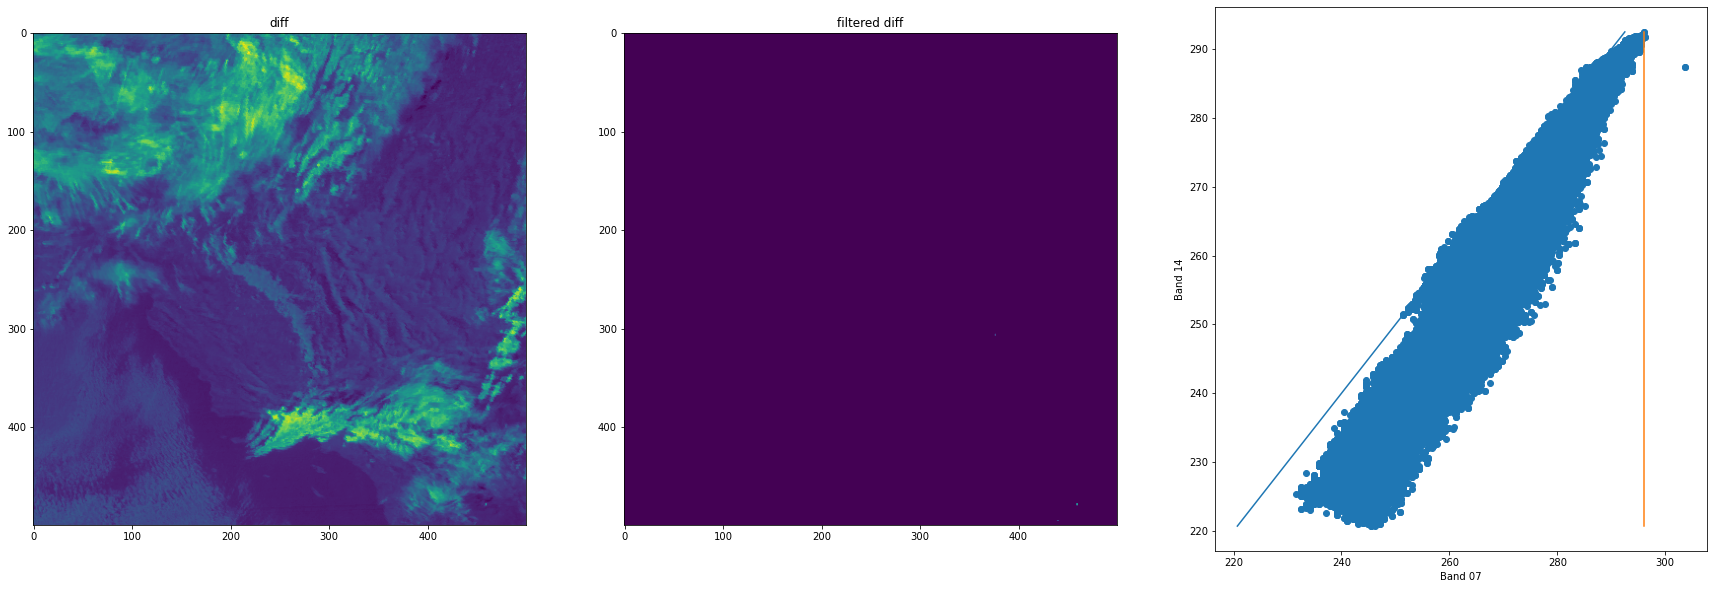

In [91]:
fig, ax = plt.subplots(1, 3, figsize=(30, 10))

diffcm = diff.copy()
mask = np.load(pathCM + CM)
mask = mask.astype(bool)
diffcm[mask] = 0

ax[0].imshow(img07-img14, aspect='equal')
ax[0].set_title('diff')

ax[1].imshow(find_fires(img07, img14), aspect='equal')
ax[1].set_title('filtered diff')

ax[2].scatter(img07, img14)
ax[2].plot([img14.min(), img14.max()], [img14.min(), img14.max()], label='x=y')
ax[2].plot([img07[np.argmax(img14)//500, np.argmax(img14) % 500], img07[np.argmax(img14)//500, np.argmax(img14) % 500]], 
           [img14.min(), img14.max()], label='fires')
ax[2].set_xlabel('Band 07')
ax[2].set_ylabel('Band 14')

plt.show()

OR_ABI-L2-FDCC-M3_G17_s20183652317190_e20183652319563_c20183652320100.npy


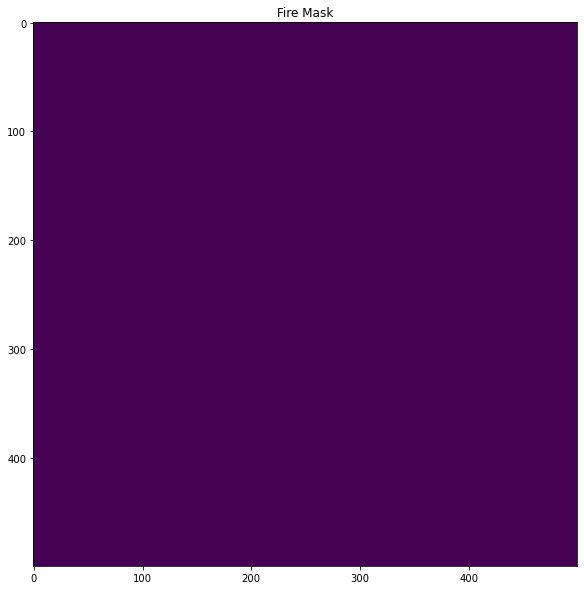

In [92]:
pathFP = '../../GOES_Files/fire/'
FP = random.choice(os.listdir(pathFP))
print(FP)
FP = np.load(pathFP + FP)

fig, ax = plt.subplots(1, figsize=(10, 10))

ax.imshow(FP, aspect='equal')
ax.set_title('Fire Mask')

plt.show()

In [93]:
def find_fires(img07, img14):
    diff = img07 - img14
    row = np.argmax(img14)//500
    col = np.argmax(img14) % 500
    diff[img07<img07[row, col]] = 0
    return diff

def find_fires_cm(mask, img07, img14):
    diff = img07 - img14
    row = np.argmax(img14)//500
    col = np.argmax(img14) % 500
    diff[img07<img07[row, col]] = 0
    diff[mask] = 0
    return fires